In [4]:
from astropy.constants import sigma_sb, k_B
from math import pi
from astropy import units
M = 3.285*(10**23)*units.kg
Q = 3.846*(10**26)*units.W
R = units.AU
T_sun = 5778 * units.K

Calculating the sphere's temperature
$$
\dot{Q} = \sigma A T^4
$$

For computational limit we use this equation

$$
E >= k_B T \cdot \ln{2}
$$

First, we will give the temperature and then computational limit of a traditional Dyson sphere (shell or swarm, makes no difference).

In [5]:
T = ((Q/(sigma_sb*4*pi*R**2)).decompose())**(1./4)
T

<Quantity 394.07983603 K>

That comes out to 121 C, which is... hot, but when you look, actually correct. I had to Google that to reassure myself.
https://canmom.art/physics/dyson-spheres#:~:text=So%20you%20have%20T%20%E2%88%9D,is%20about%20120%20%E2%88%98%20C%20.
Onto the intent of this sheet, we can get a maximum nuber of computations per second with a Dyson sphere.

In [6]:
(Q/(k_B*T)).decompose()

<Quantity 7.06873635e+46 1 / s>

### Performance With Q Varied

Now we will consider how varying the heat production can vary the different metrics we care about. Those are:
1. The useful energy that can be obtained via Carnot engines
2. The maximum number of computations that can be performed

These are distinctly different metrics with the computation being $1/T$ the useful energy. In either case, the total heat production will affect the temperature of the sphere, which then feeds into the figure-of-merit. For both, we get a different number for the optimum which is more than 0 but less that running the entire sphere at the temperature of the sun.

#### Useful Work

$$
\dot{W} = \epsilon \dot{Q} = \frac{ (T_H - T_C) }{ T_H } A \sigma T_C^4 
$$

#### Computation

$$
\dot{C} = \frac{\dot{W}}{k_B T}
$$

In [25]:
def W(T):
    return ((T_sun-T)*sigma_sb*4*pi*(units.AU**2)*(T**4)/T_sun).decompose().to(units.W)

In [26]:
# example use
W(394*units.K)

<Quantity 3.58083925e+26 W>

In [28]:
# example for room temperature, will give lower total heat production
# example use
W(293*units.K)

<Quantity 1.11568604e+26 W>

In [29]:
# how to convert to a scalar
W(394*units.K)/units.W

<Quantity 3.58083925e+26>

In [42]:
def C(T):
    return (W(T)/(k_B*T)).decompose().to(units.Hz)

In [43]:
C(394*units.K)

<Quantity 6.58271907e+46 Hz>

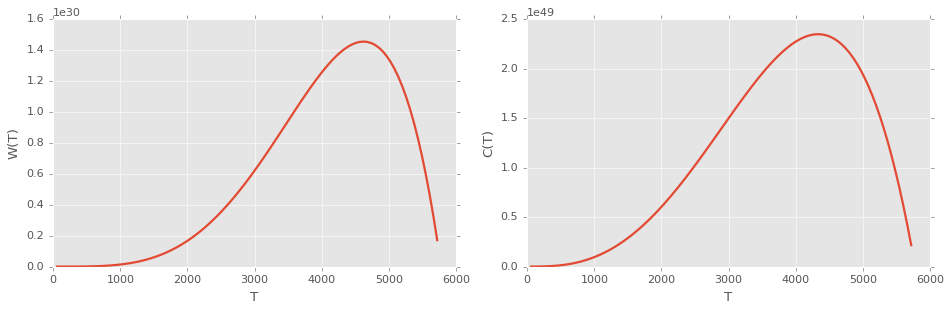

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

%matplotlib inline

pts = 100
T_inc = T_sun/(units.K*pts)
t_eval = np.arange(T_inc, T_inc*100, T_inc)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(t_eval, [W(t*units.K)/units.W for t in t_eval])
plt.xlabel('T')
plt.ylabel('W(T)')
plt.subplot(122)
plt.plot(t_eval, [C(t*units.K)/units.Hz for t in t_eval])
plt.xlabel('T')
plt.ylabel('C(T)')
plt.tight_layout()
plt.show()

### Commentary

You can see the peak occuring at slightly lower temperatures for the C graph than for the W graph. You can get the temperature of the max point symbolically.

$$
\dot{W} = \frac{ (T_H - T_C) }{ T_H } A \sigma T_C^4 = A \sigma \left( T_C^4 - \frac{T_C^5}{T_H} \right)
$$

Maximum occurs when the derivative is at zero. (the reverse statement often isn't true, but it will not matter)

$$
\frac{dW}{dT_C} = 0 = A \sigma \left( 4 T_C^3 - 5 \frac{T_C^4}{T_H} \right)
$$

$$
4 T_C^3 = 5 \frac{T_C^4}{T_H}
$$

$$
4 = 5 \frac{T_C}{T_H}
$$

$$
T_C = \frac{4}{5} T_H
$$

You can do the same thing for the C equation, and you will ultimately find a $3/4$ factor, matching with the plots.